In [1]:
from __future__ import division

In [2]:
import toolbox as tbx

In [17]:
import os
import re
import glob
import dateutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [10]:
# set up the directories for the files you'd like to see
base_directory = os.path.join(os.getenv("HOME"), 'Research/data/ENA')

uhsas_directory = os.path.join(base_directory, 'uhsas/aos')
cn_directory = os.path.join(base_directory, 'cn')
ccn_directory = os.path.join(base_directory, 'ccn')
met_directory = os.path.join(base_directory, 'met')

In [19]:
UHSAS = tbx.fileIO.NetCDFFolder(uhsas_directory)
CN = tbx.fileIO.NetCDFFolder(cn_directory)
CCN = tbx.fileIO.NetCDFFolder(ccn_directory)
MET = tbx.fileIO.NetCDFFolder(met_directory)

datastreams = (UHSAS, CN, CCN, MET)

In [20]:
for d in datastreams:
    d.summary()
    d.datelist = np.array([dateutil.parser.parse(os.path.split(f)[-1].split('.')[2]) for f in d.filelist])

datelists = tuple([d.datelist for d in datastreams])
labels = ("UHSAS", "CN", "CCN", "MET")

/Users/jstemm/Research/data/ENA/uhsas/aos
Found 543 files total
 > Found 543 items for datastream enaaosuhsasC1

/Users/jstemm/Research/data/ENA/cn
Found 483 files total
 > Found 483 items for datastream enaaoscpcfC1

/Users/jstemm/Research/data/ENA/ccn
Found 642 files total
 > Found 642 items for datastream enaaosccn100C1

/Users/jstemm/Research/data/ENA/met
Found 697 files total
 > Found 697 items for datastream enametC1



In [15]:
dtmin, dtmax = (np.min([i.min() for i in datelists]), np.max([j.max() for j in datelists]))

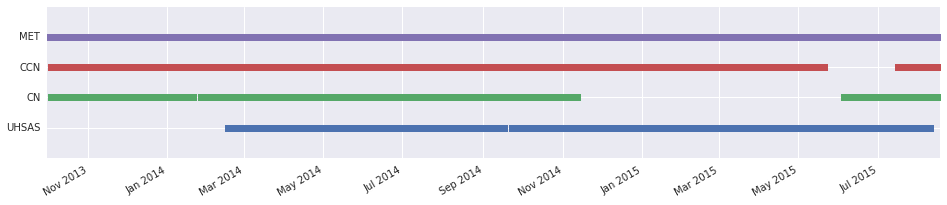

In [18]:
fig, ax = plt.subplots(figsize=(16, 3))
for i,d in enumerate(datelists):
    ax.plot(d, np.ones_like(d)*i, 's', mec='none', label=labels[i])
#ax.legend(ncol=i+1)
ax.set_ylim(-1, i+1)
ax.set_yticks(range(i+1))
ax.set_yticklabels(labels)
ax.set_xlim(dtmin, dtmax)
fig.autofmt_xdate()